# Visualization of Neighborhoods Tutorial

**Objective**: 
This tutorial covers how to perform visualize neighborhoods based on two approaches.  
    
    1) Grabbing a bounding box region a vertex
    2) Grabbing n neighbors around a vertex

In [1]:
from brainlit.utils.Neuron_trace import NeuronTrace
from brainlit.utils.session import NeuroglancerSession
import numpy as np
from cloudvolume import CloudVolume
import napari
from napari.utils import nbscreenshot

%gui qt5

**Reading data from s3 path**

In [3]:
"""
s3_path = "s3://open-neurodata/brainlit/brain1_segments"
seg_id,  v_id, mip = 2, 10, 1 # skeleton/neuron id, index/row of df, resolution quality

s3_trace = NeuronTrace(path=s3_path,seg_id=seg_id,mip=mip)
df = s3_trace.get_df()
df.head()
"""

Downloading: 100%|██████████| 1/1 [00:00<00:00,  9.13it/s]


,sample,structure,x,y,z,r,parent
0,1,0,4717.0,4464.0,3855.0,1.0,-1
1,4,192,4725.0,4439.0,3848.0,1.0,1
2,7,64,4727.0,4440.0,3849.0,1.0,4
3,8,0,4732.0,4442.0,3850.0,1.0,7
4,14,0,4749.0,4439.0,3856.0,1.0,8


**Converting dataframe to graph data structure to understand how vertices are connected**

In [4]:
# G = s3_trace.get_graph()
# paths = s3_trace.get_paths()
# print(f"The graph was decomposed into {len(paths)} paths")

The graph was decomposed into 179 paths


**Plotting the entire skeleton/neuron**

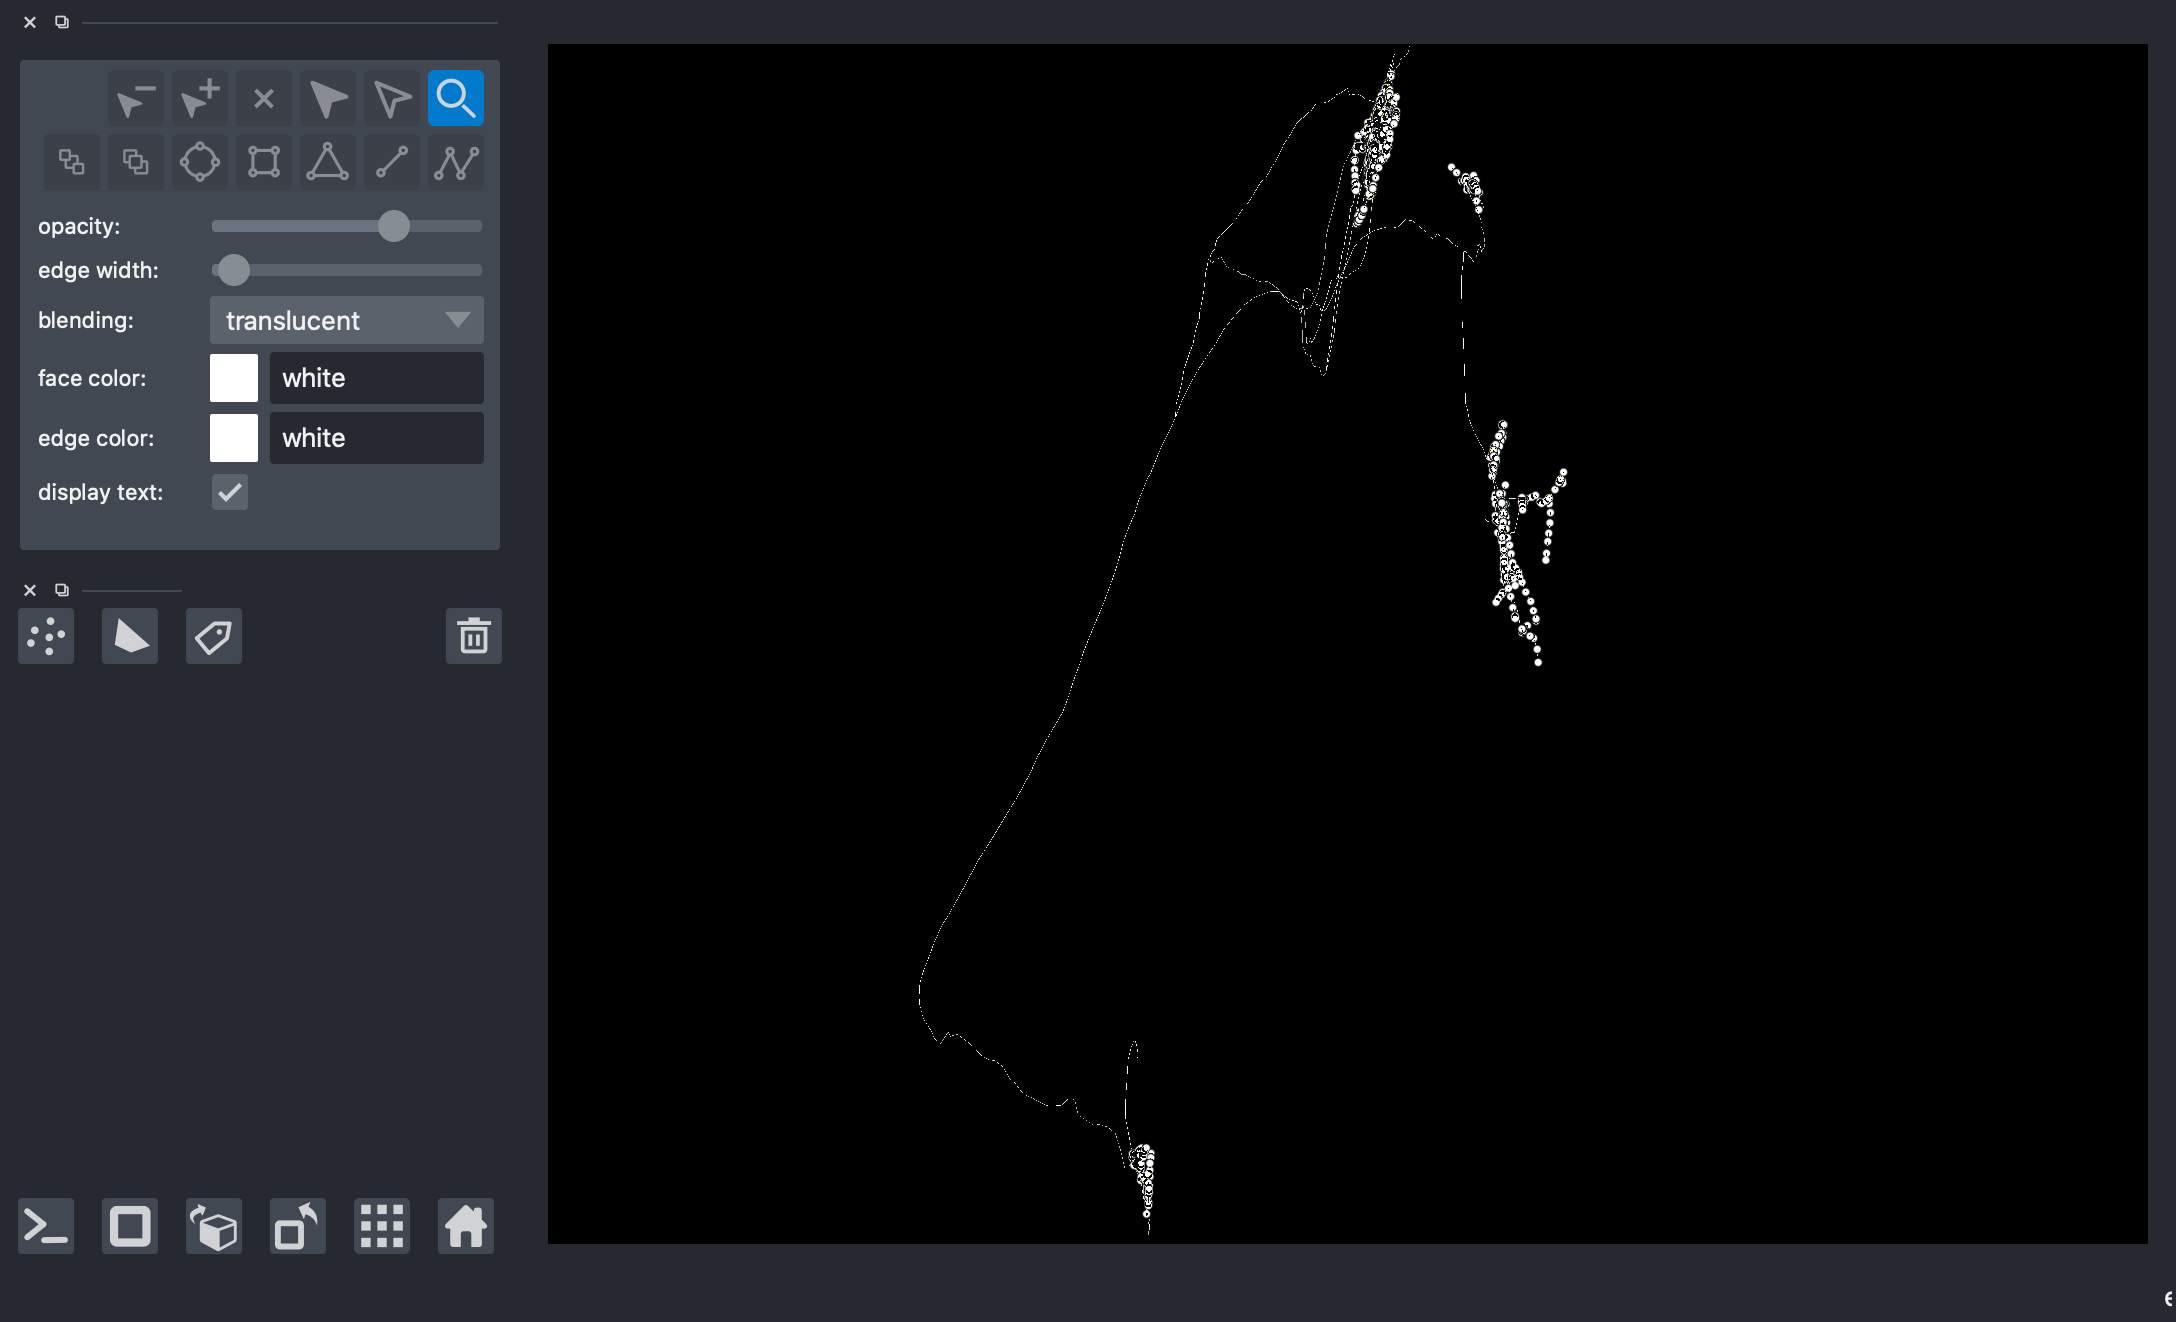

In [5]:
# viewer = napari.Viewer(ndisplay=3)
# # it is important that the number of paths put into 'data=' is at the most 1024
# viewer.add_points(data=np.concatenate(paths)[804:], edge_width=2, edge_color='white', name='Skeleton 2')
# viewer.add_shapes(data=paths, shape_type='path', edge_color='white', name='Skeleton 2')
# nbscreenshot(viewer)


## Bounding Box Method

**Creating a bounding box based on a particular vertex of interest in order to get a group of neurons neighboring the vertex of interest**

In [6]:
# url = "s3://open-neurodata/brainlit/brain1"
# mip = 1
# ngl = NeuroglancerSession(url, mip=mip)

# img, bbbox, vox = ngl.pull_chunk(2, 300, 1)
# bbox = bbbox.to_list()
# box = (bbox[:3], bbox[3:])
# print(box)

Downloading: 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]
Downloading: 52it [00:02, 21.56it/s]([7392, 2300, 3120], [7788, 2600, 3276])



**Getting all the coordinates of the group surrounding the vertex of interest using get_sub_neuron()**  
Note: data correction step necessary due to recentering in function!

In [7]:
# G_sub = s3_trace.get_sub_neuron(box)

# # preventing the re-centring of nodes to the bounding box corner (origin of the new coordinate frame)
# for id in list(G_sub.nodes):
#     G_sub.nodes[id]["x"] = G_sub.nodes[id]["x"] + box[0][0]
#     G_sub.nodes[id]["y"] = G_sub.nodes[id]["y"] + box[0][1]
#     G_sub.nodes[id]["z"] = G_sub.nodes[id]["z"] + box[0][2]

# paths_sub = s3_trace.get_sub_neuron_paths(box)

**Plotting vertex and vertex neighborhood**

Downloading: 100%|██████████| 1/1 [00:00<00:00,  7.97it/s]
[6263.70139759 6573.55819874 2210.2198857 ]


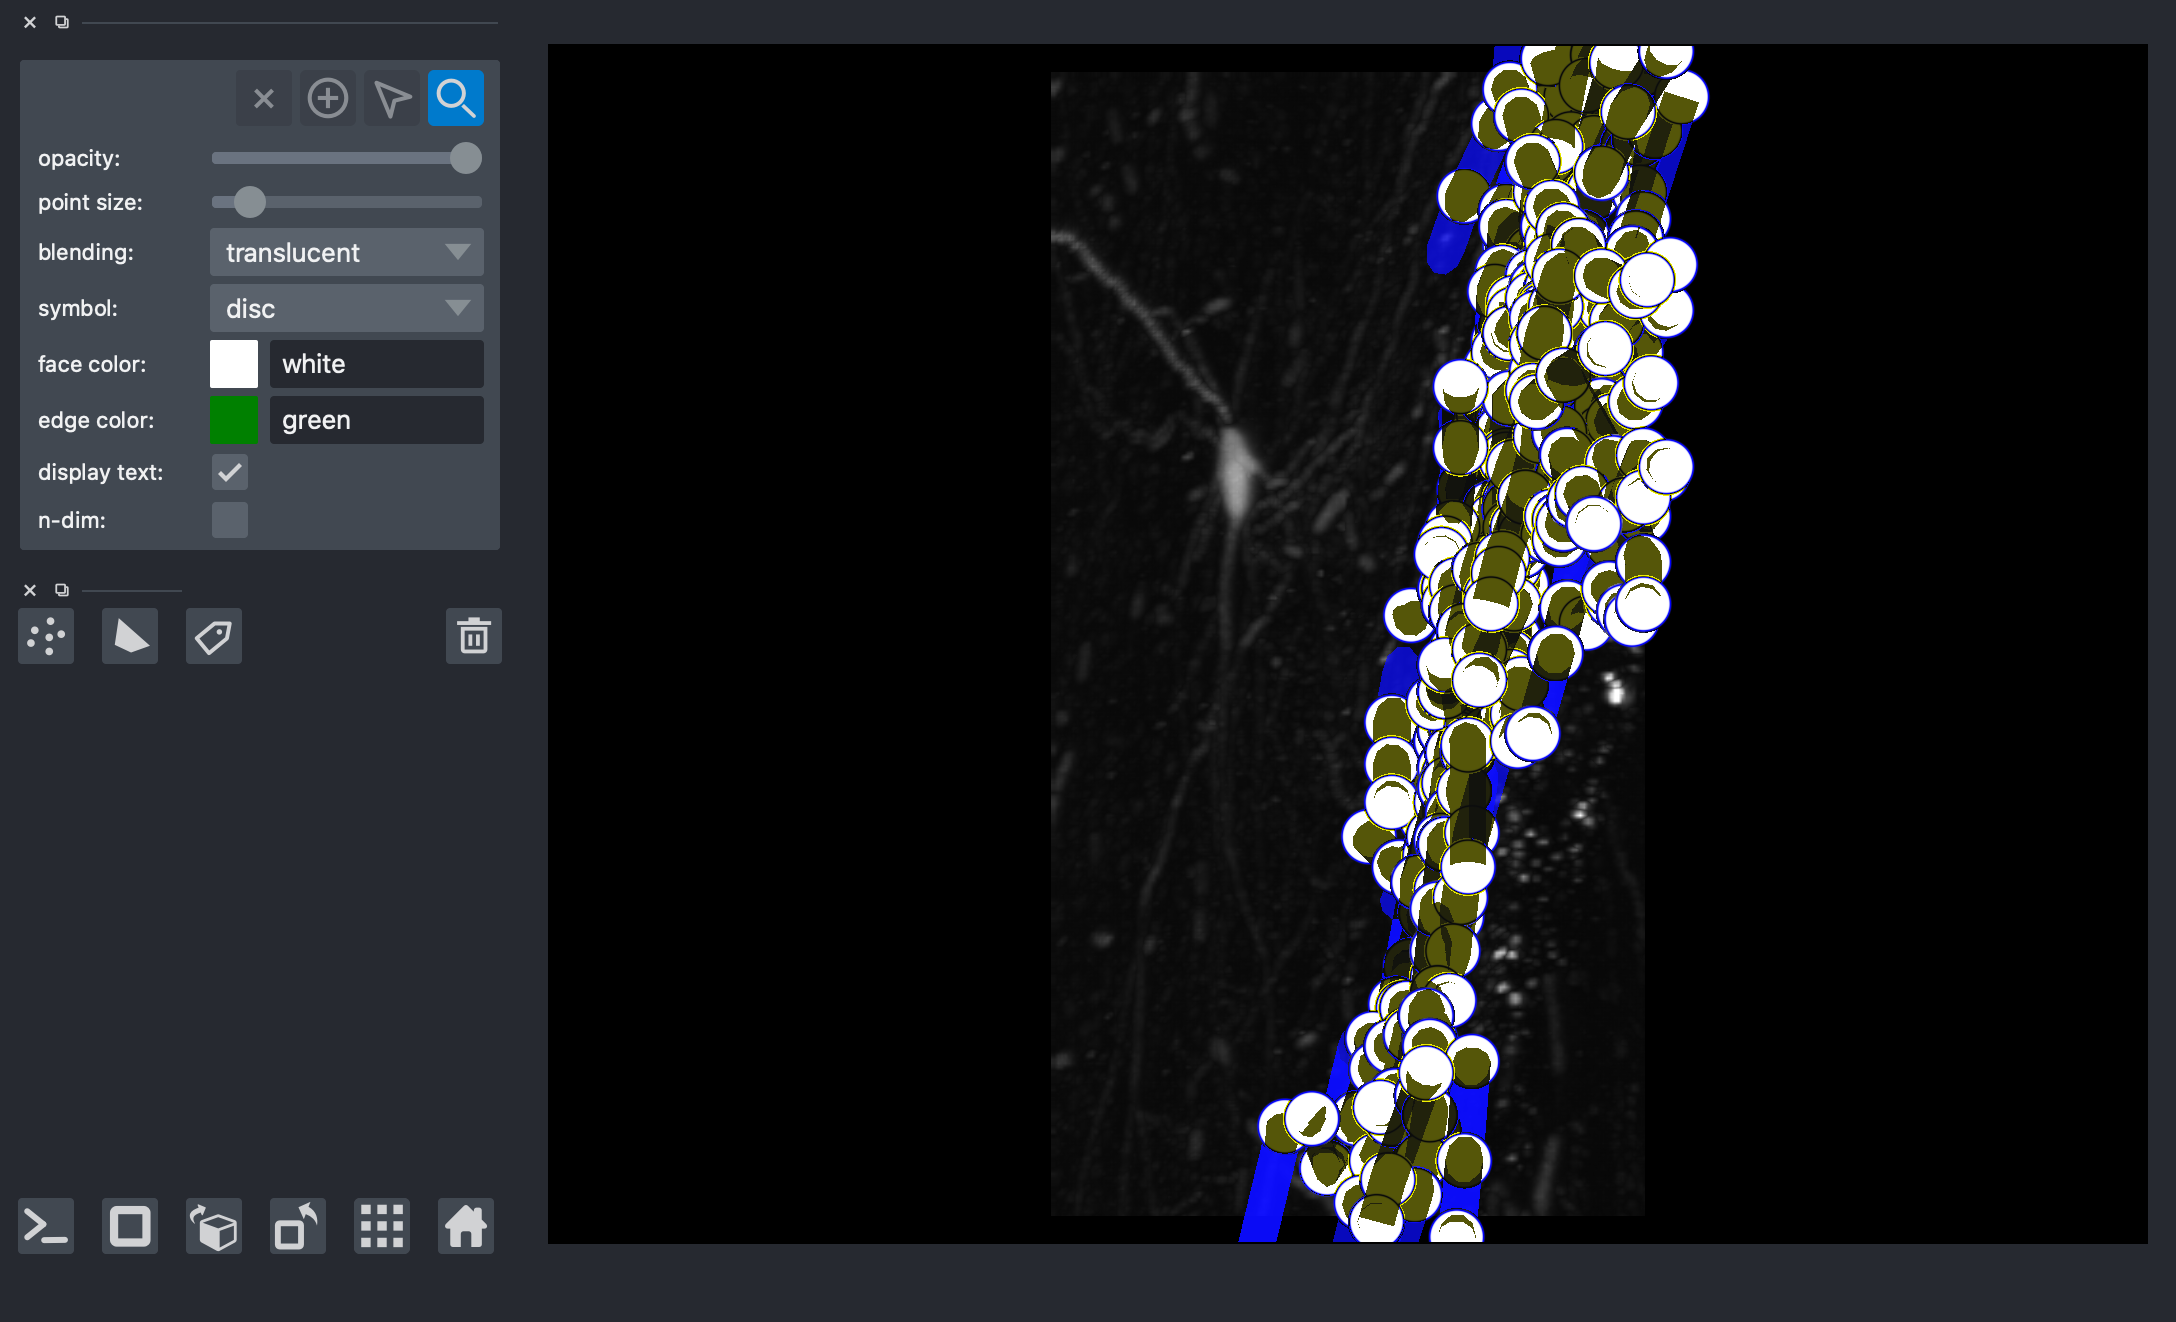

In [11]:
# # grab the coordinates of the vertex from the skeleon
# cv_skel = CloudVolume(s3_path, mip=mip, use_https=True)
# skel = cv_skel.skeleton.get(seg_id)
# vertex = skel.vertices[v_id]/cv_skel.scales[mip]["resolution"]
# print(vertex)

# viewer = napari.Viewer(ndisplay=3)
# viewer.add_image(np.squeeze(np.array(img)))
# viewer.add_points(data=np.concatenate(paths_sub), edge_width=1, edge_color='blue', name='Skeleton 2')
# viewer.add_shapes(data=paths_sub, shape_type='path', edge_color='blue', name='Neighborhood',edge_width=5)

# # display vertex
# viewer.add_points(data=np.array(vertex), edge_width=2, edge_color='green', name='vertex')
# nbscreenshot(viewer)

## Neighbors Method

In [12]:
# # grab the coordinates of the vertex from the skeleon
# cv_skel = CloudVolume(s3_path, mip=mip, use_https=True)
# skel = cv_skel.skeleton.get(seg_id)
# vertex = skel.vertices[v_id]/cv_skel.scales[mip]["resolution"]
# print(vertex)

# # figure out where the vertex information is stored in the dataframe
# x, y, z = np.round((vertex))[0], np.round((vertex))[1], np.round((vertex))[2]
# slice_df = (df[(df.x == x)&(df.y==y)&(df.z==z)])
# v_idx = np.where((df.x == x)&(df.y==y)&(df.z==z))
# v_idx = v_idx[0][0]
# print(v_idx)
# slice_df.head()

Downloading: 100%|██████████| 1/1 [00:00<00:00,  7.64it/s][6263.70139759 6573.55819874 2210.2198857 ]
469



,sample,structure,x,y,z,r,parent
469,434,0,6264.0,6574.0,2210.0,1.0,431


**On another napari window, plot again the entire neuron/skeleton.**

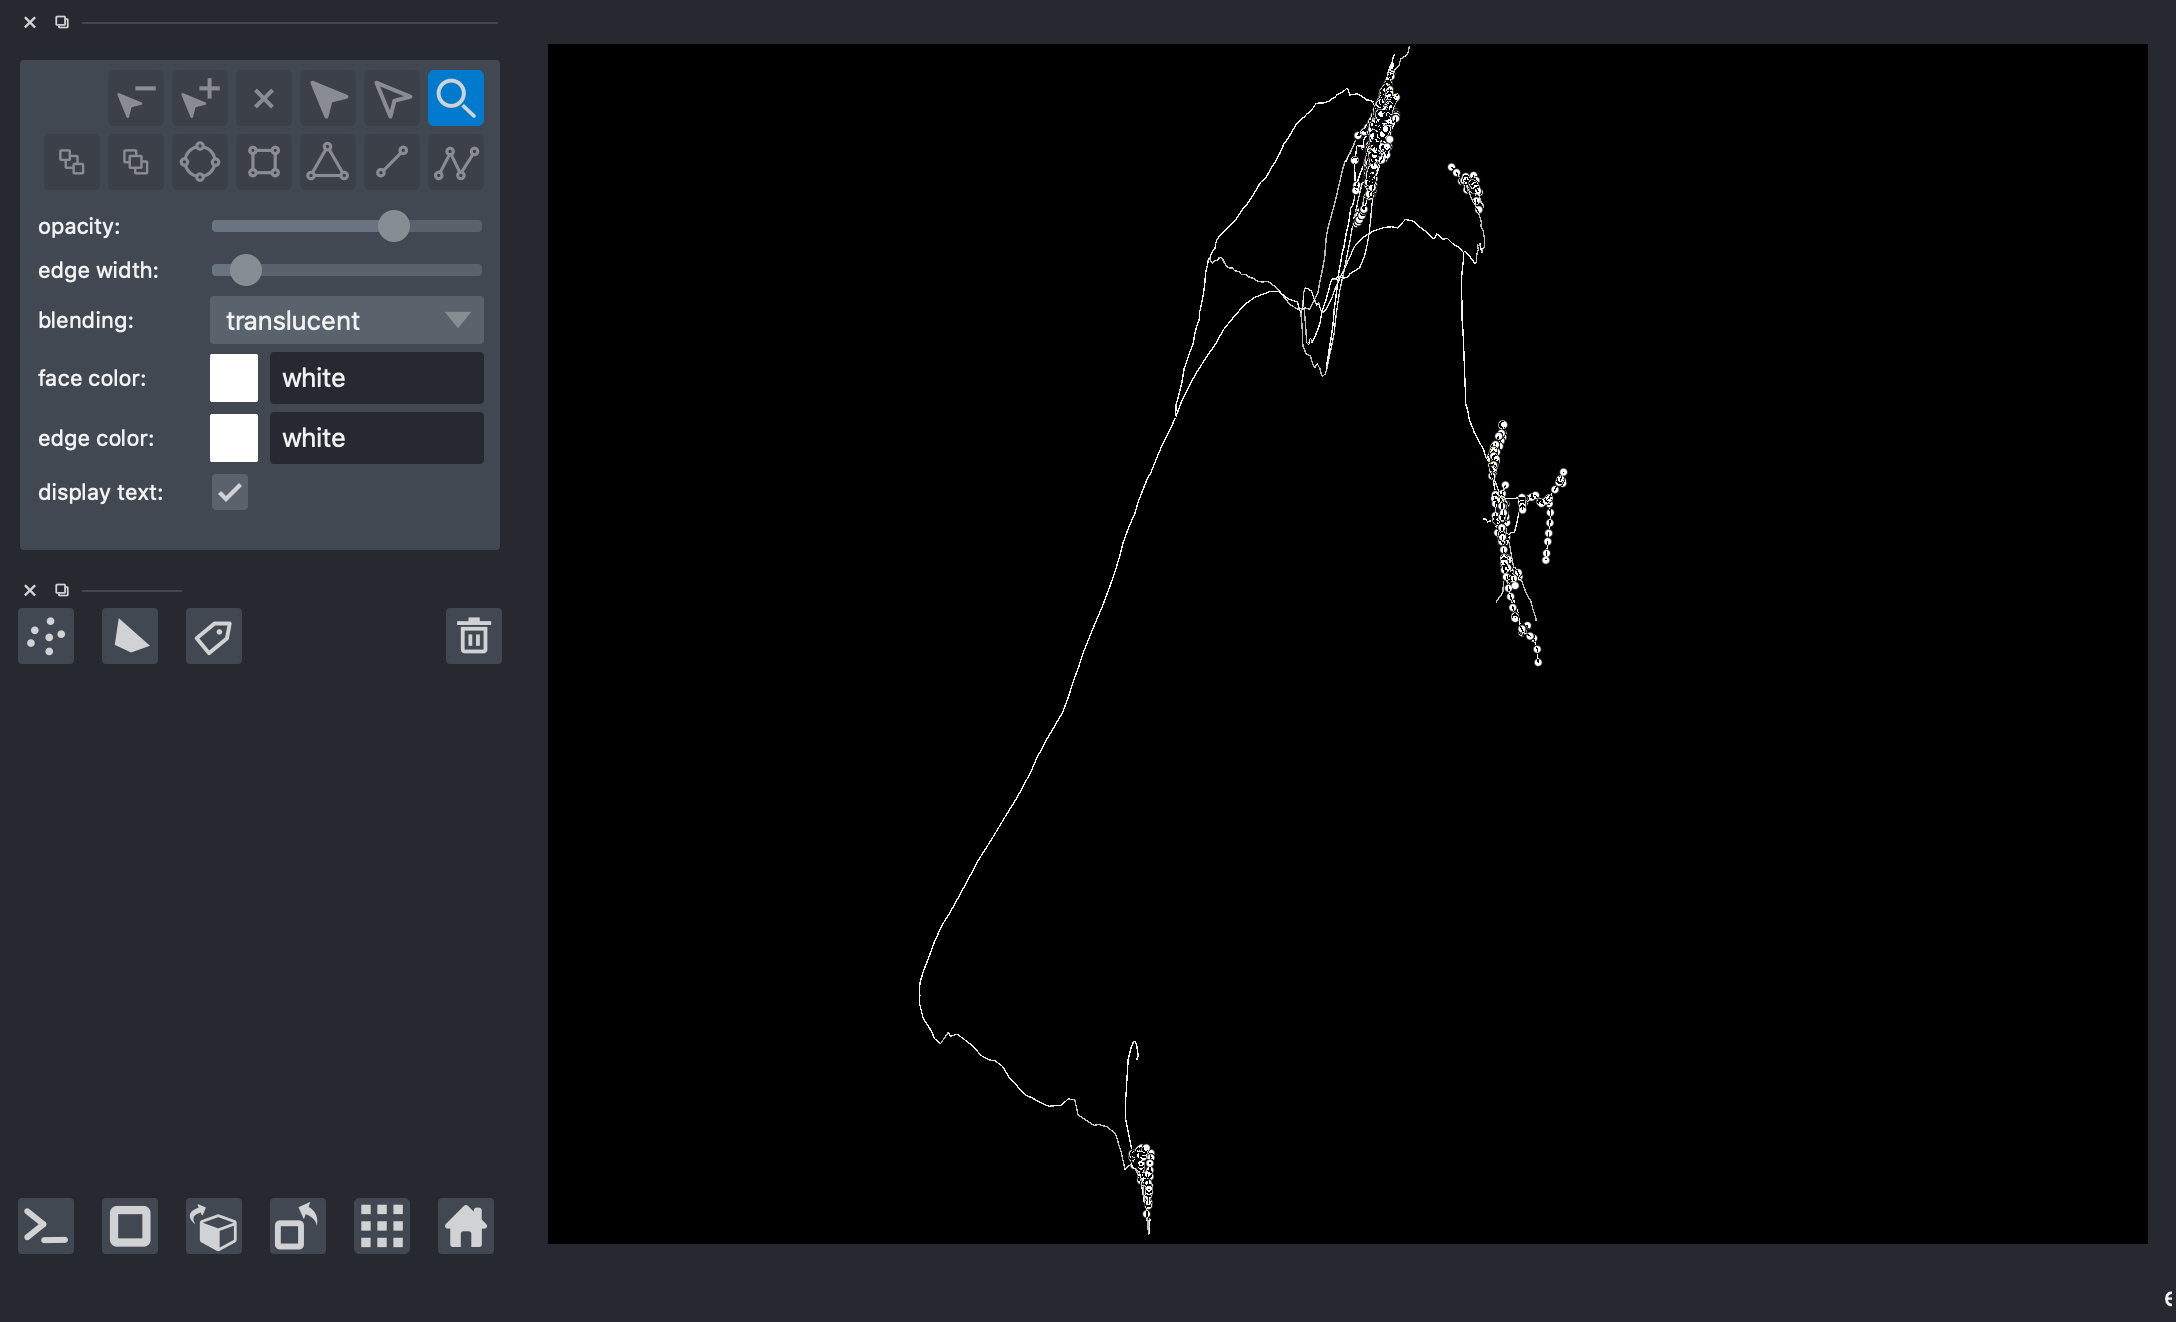

In [13]:
# viewer = napari.Viewer(ndisplay=3)
# viewer.add_points(data=np.concatenate(paths, axis=0)[1024:], edge_width=2, edge_color='white', name='all_points')
# viewer.add_shapes(data=paths, shape_type='path', edge_color='white', edge_width=3, name='skeleton')
# nbscreenshot(viewer)

**Get the coordinates of the neighobrs around vertex of interest using get_bfs_subgraph() and graphs_to_paths**

In [14]:
# v_id_pos = v_idx  # the row index/number of the data frame
# depth = 10  # the depth up to which the graph must be constructed

# G_bfs, _, paths_bfs =s3_trace.get_bfs_subgraph(int(v_id_pos), depth, df=df)  # perform Breadth first search to obtain a graph of interest

**Plot the vertex and vertex neighborhood**

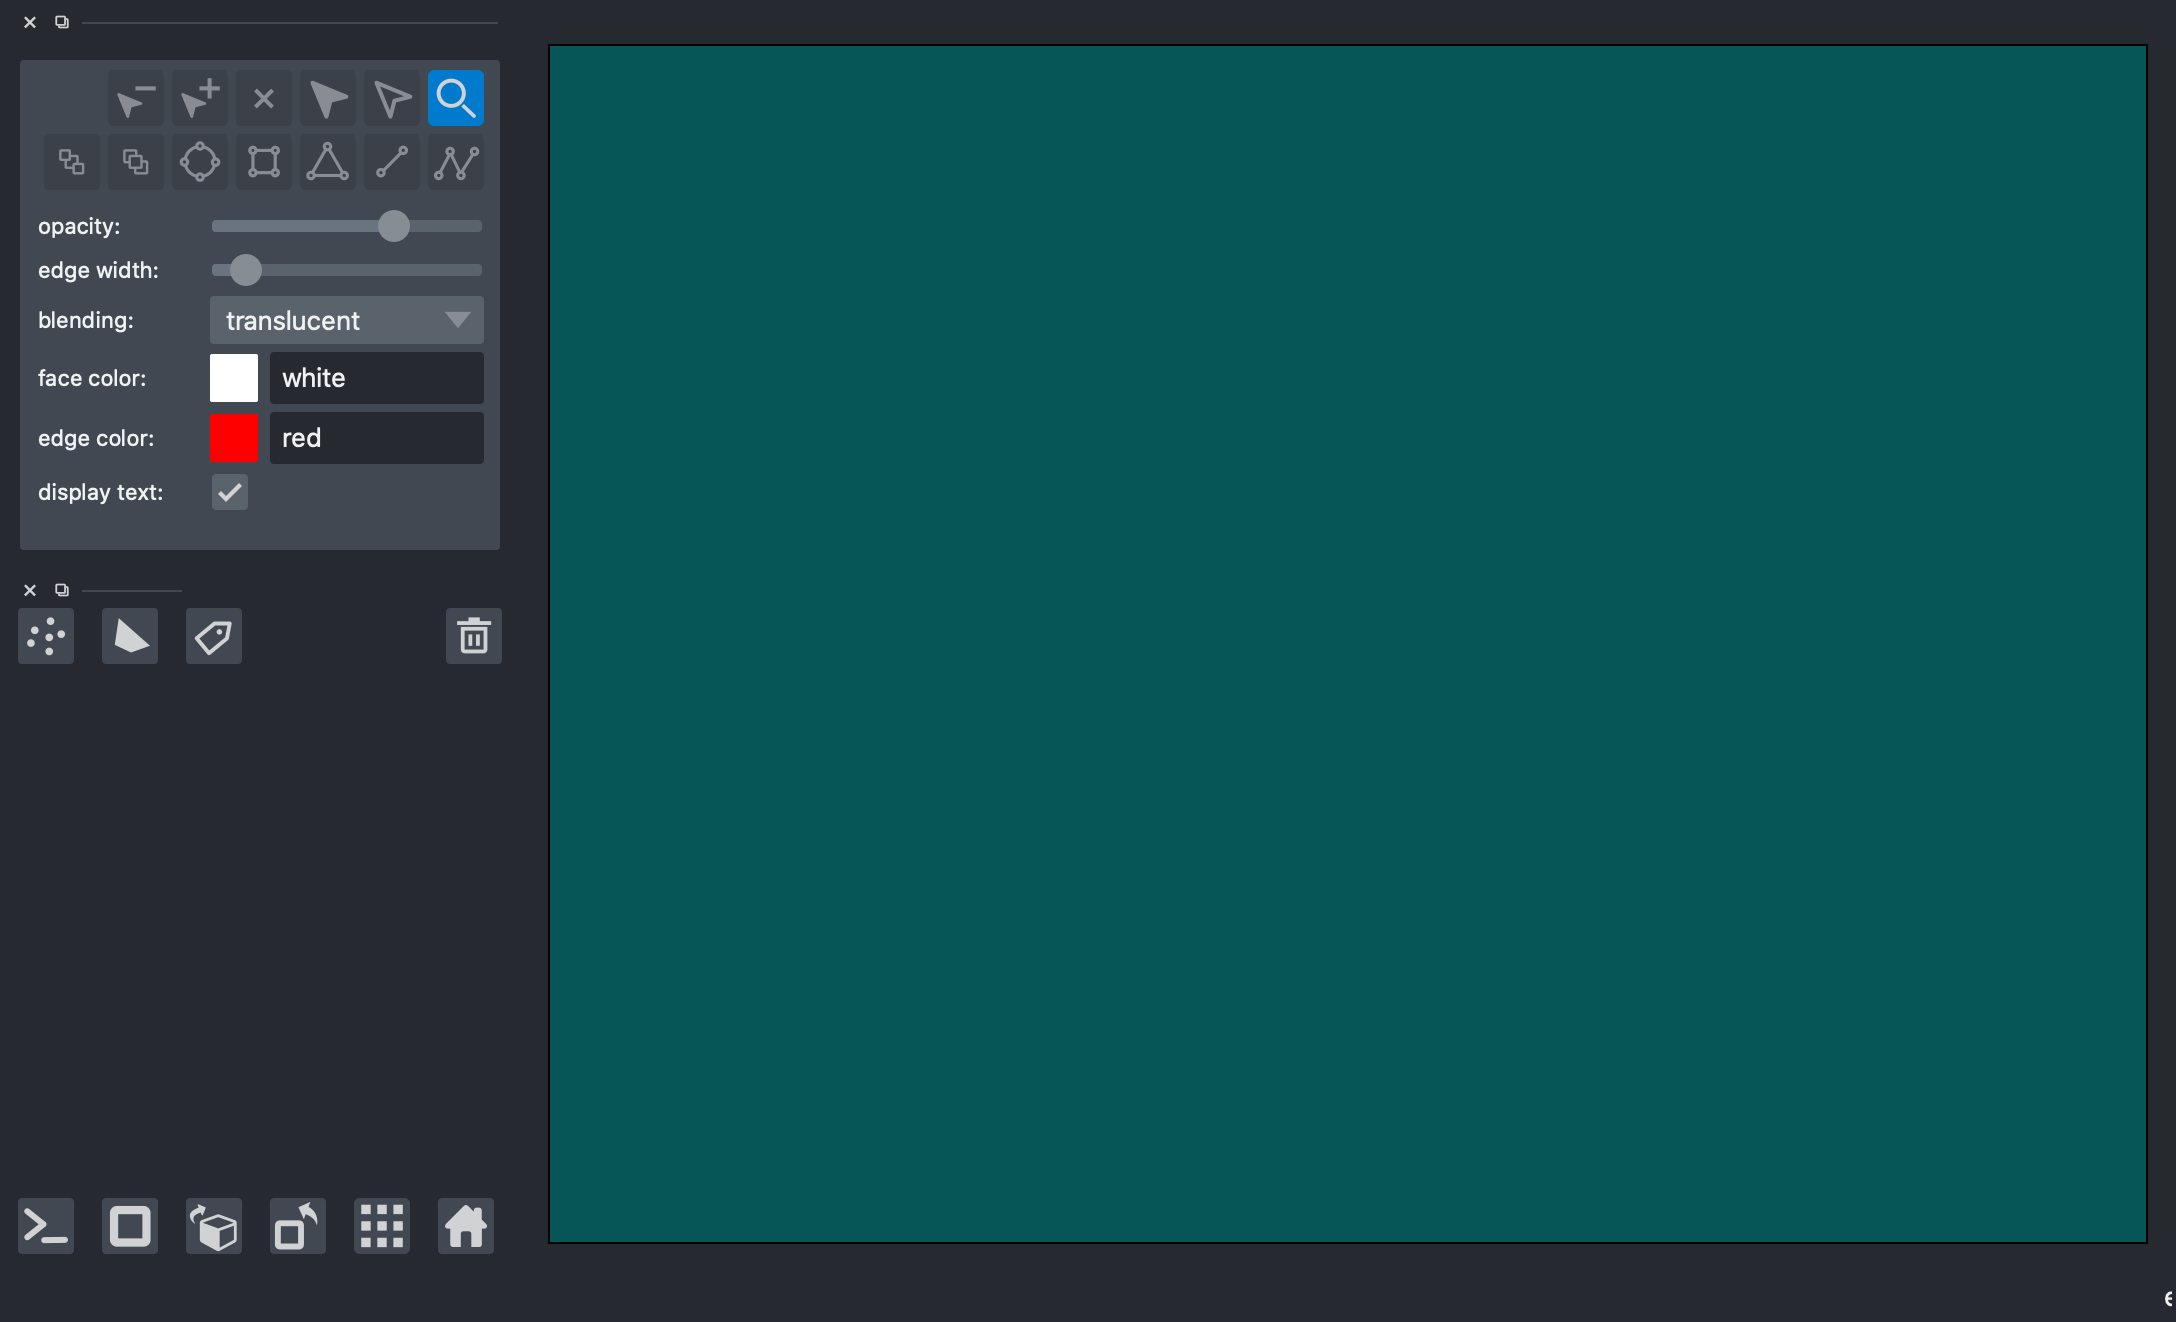

In [22]:
# x,y,z = df.iloc[v_id_pos]['x'], df.iloc[v_id_pos]['y'], df.iloc[v_id_pos]['z']

# # display vertex
# viewer = napari.Viewer(ndisplay=3)

# viewer.add_points(data=np.array([x,y,z]), edge_width=5, edge_color='orange', name='bfs_vertex')

# # display all neighbors around vertex
# viewer.add_points(data=np.concatenate(paths_bfs), edge_color='red', edge_width=2, name='bfs_points')
# viewer.add_shapes(data=paths_bfs, shape_type='path', edge_color='red', edge_width=3, name='bfs_sub_skeleton')
# nbscreenshot(viewer)

## Visualizing the output of both methods overlaid

**Create new napari window**

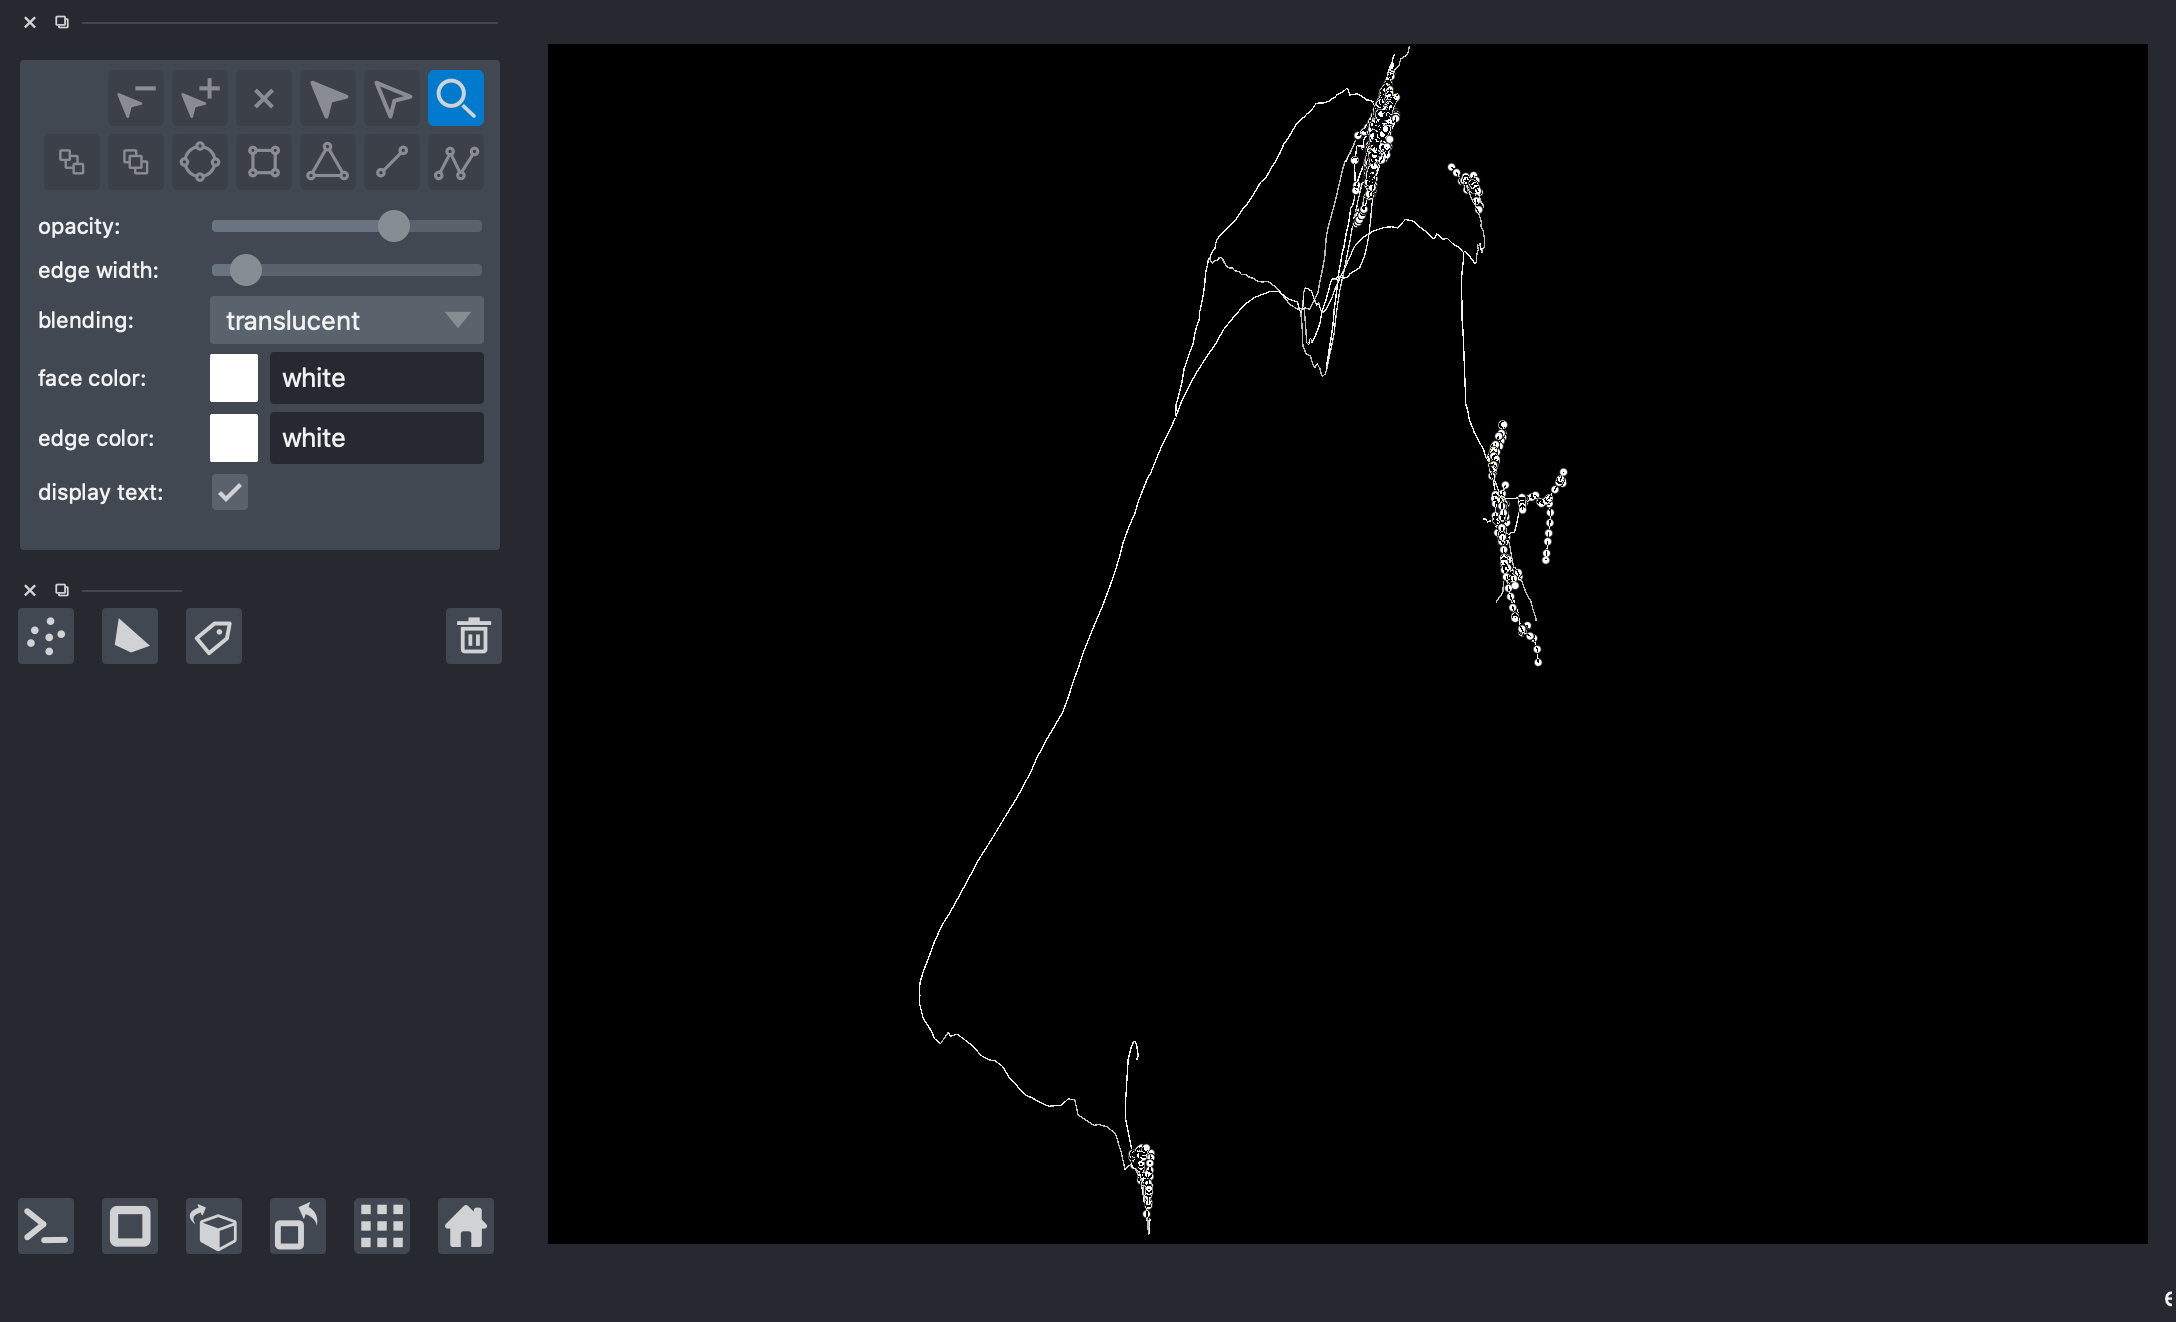

In [21]:
# viewer = napari.Viewer(ndisplay=3)
# viewer.add_points(data=np.concatenate(paths, axis=0)[1024:], edge_width=2, edge_color='white', name='all_points')
# viewer.add_shapes(data=paths, shape_type='path', edge_color='white', edge_width=3, name='full_skeleton')
# nbscreenshot(viewer)

**Plot vertices and neighborhoods of each method on the same napari window to compare method outputs**

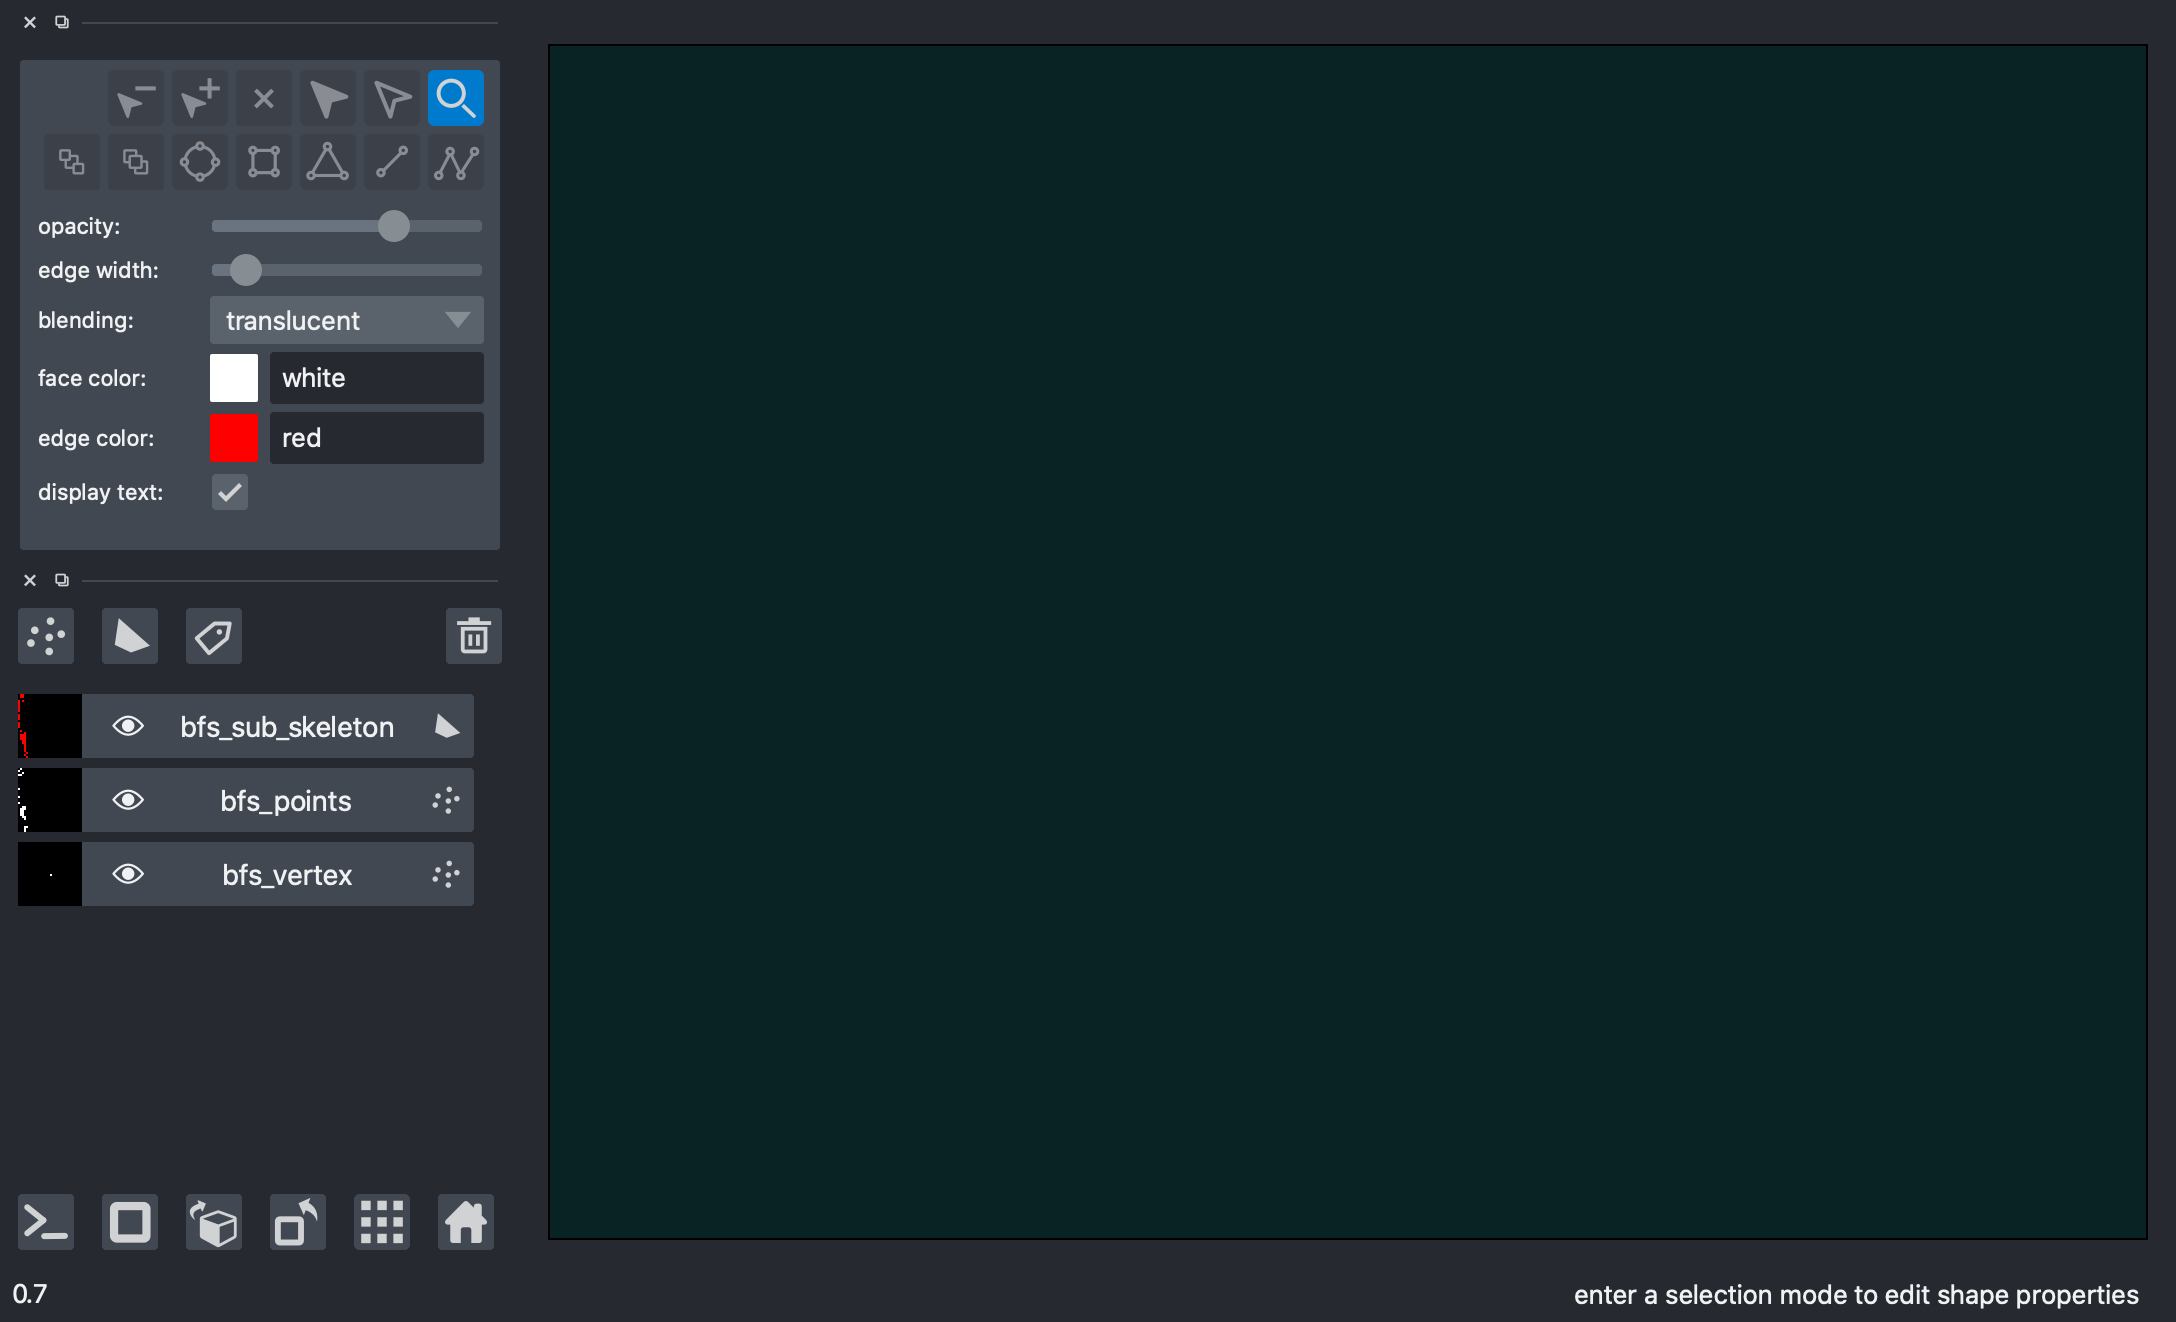

In [23]:
# # display vertex of the boundary method
# viewer.add_points(data=np.array(vertex), edge_width=5, edge_color='green', name='boundary_vertex')

# # display all neighbors around vertex of boundary method
# viewer.add_points(data=np.concatenate(paths_sub), edge_width=2, edge_color='blue', name='boundary_skeleton_pts')
# viewer.add_shapes(data=paths_sub, shape_type='path', edge_color='blue', name='boundary_skeleton_lines',edge_width=5)

# # display vertex of the bfs method
# x,y,z = df.iloc[v_id_pos]['x'], df.iloc[v_id_pos]['y'], df.iloc[v_id_pos]['z']
# viewer.add_points(data=np.array([x,y,z]), edge_width=5, edge_color='orange', name='bfs_vertex')

# # display all neighbors around vertex of bfs method
# viewer.add_points(data=np.concatenate(paths_bfs), edge_color='red', edge_width=2, name='bfs_skeleton_pts')
# viewer.add_shapes(data=paths_bfs, shape_type='path', edge_color='red', edge_width=3, name='bfs_skeleton_lines')
# nbscreenshot(viewer)